In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import math
import warnings

# Load data
file_path = '/content/diabetes.csv'
diabetes_data = pd.read_csv(file_path)

# Remove missing values
diabetes_clean = diabetes_data.dropna()

# Remove leading and trailing white spaces
diabetes_clean = diabetes_clean.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))


# Remove duplicates
diabetes_clean = diabetes_clean.drop_duplicates()

# Display the cleaned data
diabetes_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


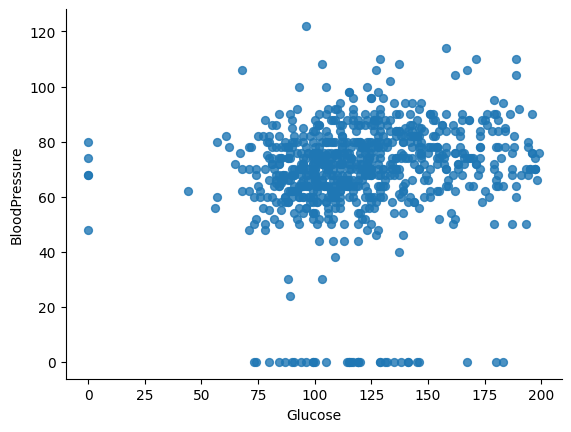

In [4]:
# @title Glucose vs BloodPressure

from matplotlib import pyplot as plt
diabetes_clean.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

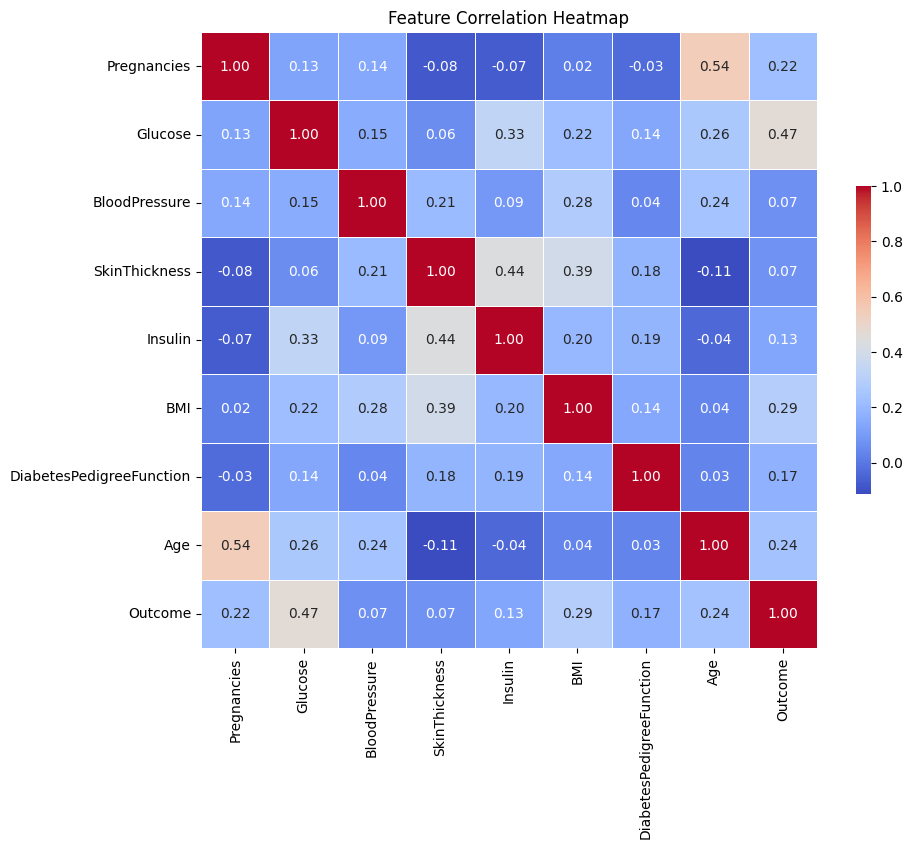

In [6]:
# Compute the correlation matrix
corr = diabetes_clean.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Improve the layout
plt.title('Feature Correlation Heatmap')
plt.show()

In [7]:
# Calculate correlation coefficients for all columns
correlation_matrix = diabetes_clean.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose             

In [8]:
# Select necessary columns
diabetes_filtered = diabetes_clean[['Glucose', 'BMI', 'Age', 'Outcome']]

diabetes_filtered.head()
diabetes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  768 non-null    int64  
 1   BMI      768 non-null    float64
 2   Age      768 non-null    int64  
 3   Outcome  768 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 24.1 KB


Summary Statistics:
           Glucose         Age         BMI
count  768.000000  768.000000  768.000000
mean   120.894531   33.240885   31.992578
std     31.972618   11.760232    7.884160
min      0.000000   21.000000    0.000000
25%     99.000000   24.000000   27.300000
50%    117.000000   29.000000   32.000000
75%    140.250000   41.000000   36.600000
max    199.000000   81.000000   67.100000


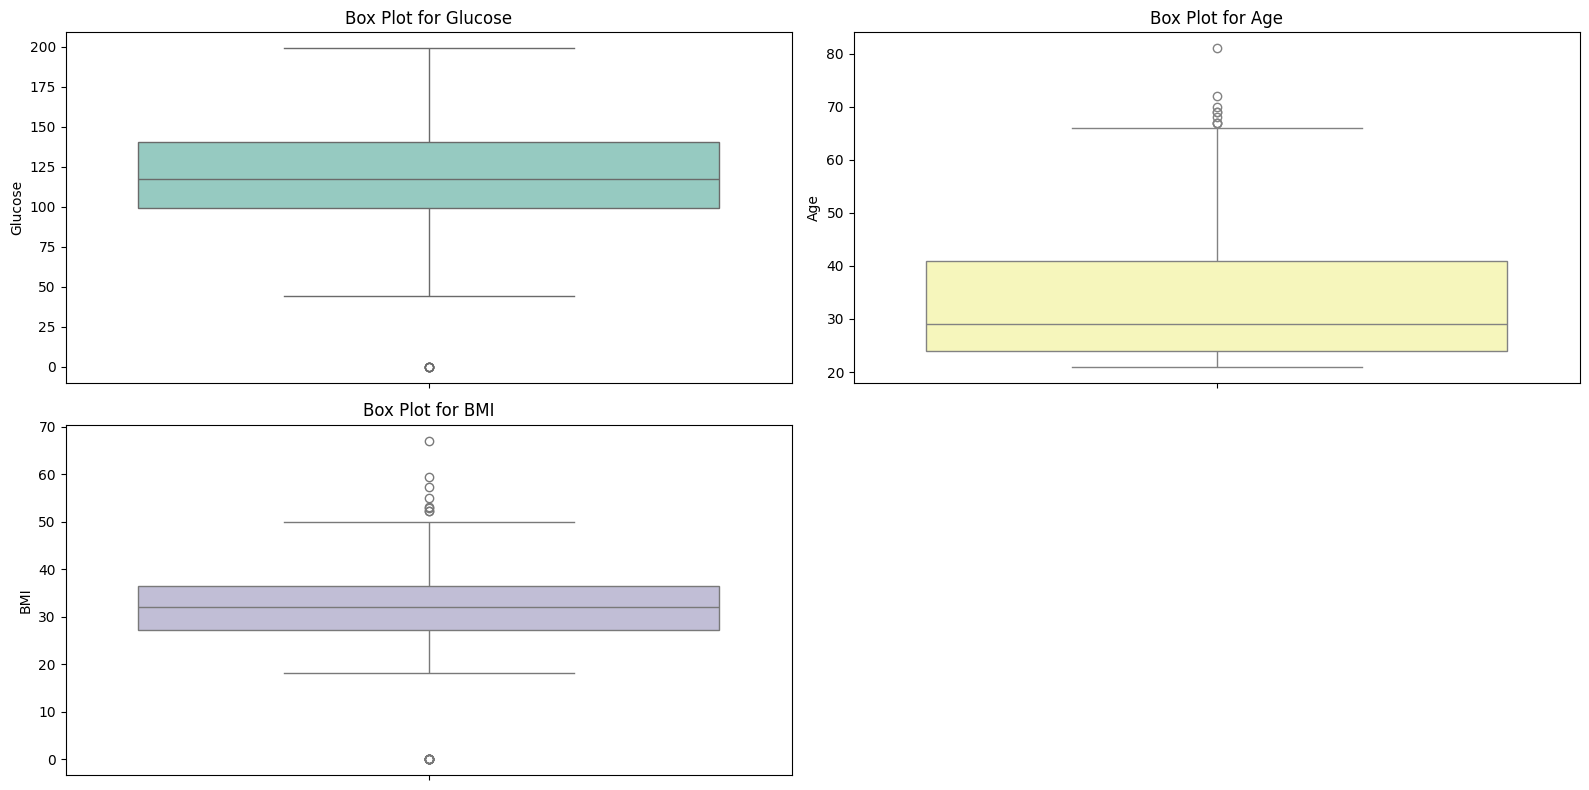

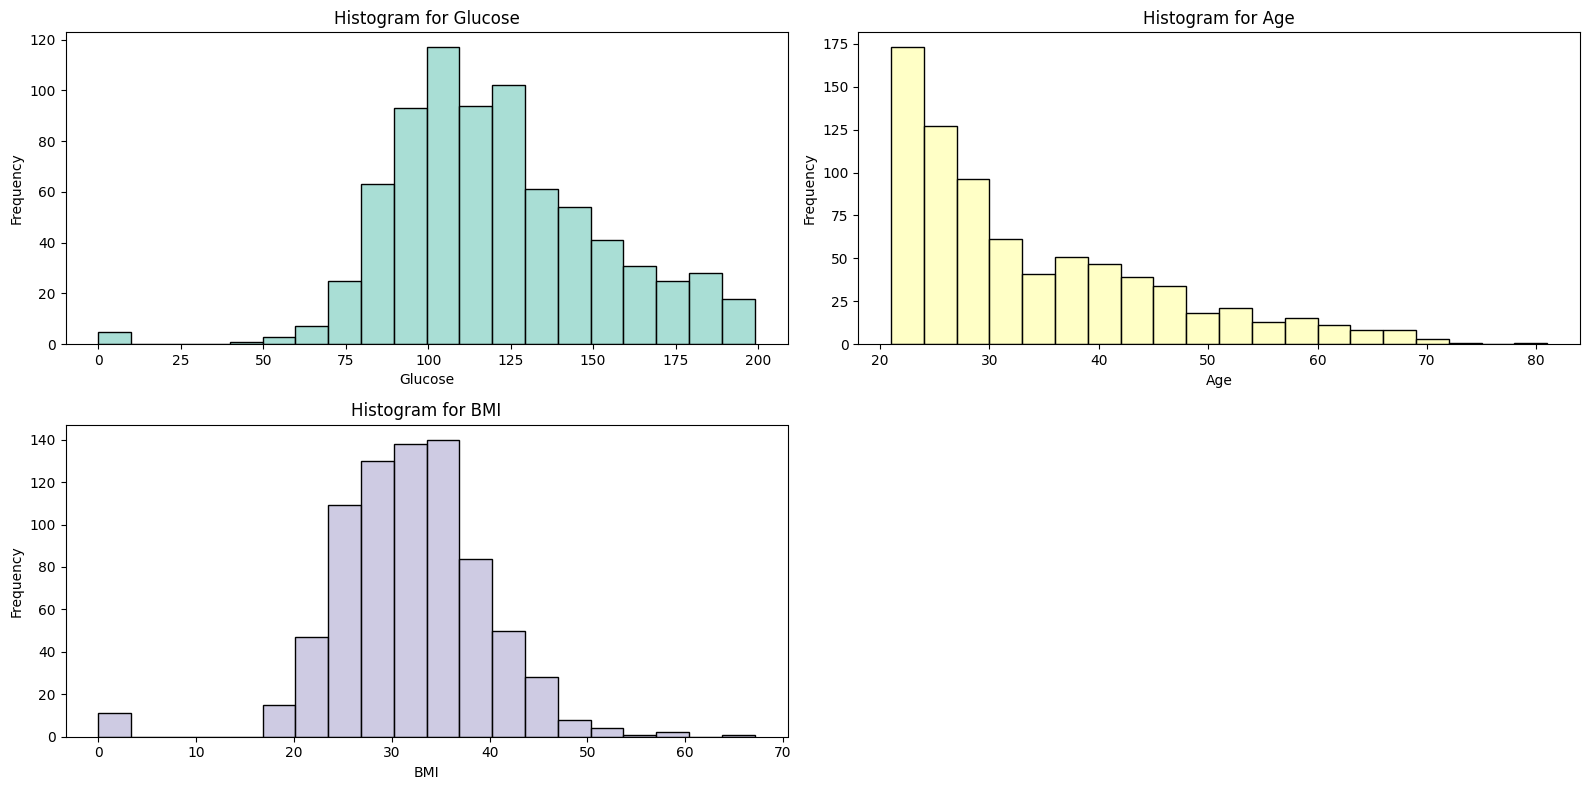

In [9]:
# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

# View summary stats for selected features (excluding 'Pregnancies')
diabetes_stats = diabetes_filtered[['Glucose', 'Age', 'BMI']].describe()
print("Summary Statistics:\n", diabetes_stats)

# Set up the color palette
palette = sns.color_palette("Set3")

# Identify outliers using box plots for each feature using Seaborn (excluding 'Pregnancies')
plt.figure(figsize=(16, 8))

# Box plot for Glucose
plt.subplot(2, 2, 1)
sns.boxplot(y='Glucose', data=diabetes_filtered, color=palette[0])
plt.title('Box Plot for Glucose')

# Box plot for Age
plt.subplot(2, 2, 2)
sns.boxplot(y='Age', data=diabetes_filtered, color=palette[1])
plt.title('Box Plot for Age')

# Box plot for BMI
plt.subplot(2, 2, 3)
sns.boxplot(y='BMI', data=diabetes_filtered, color=palette[2])
plt.title('Box Plot for BMI')

plt.tight_layout()
plt.show()

# Analyze general distribution of values using histograms with Seaborn (excluding 'Pregnancies')
plt.figure(figsize=(16, 8))

# Histogram for Glucose
plt.subplot(2, 2, 1)
sns.histplot(diabetes_filtered['Glucose'], bins=20, kde=False, color=palette[0])
plt.title('Histogram for Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')

# Histogram for Age
plt.subplot(2, 2, 2)
sns.histplot(diabetes_filtered['Age'], bins=20, kde=False, color=palette[1])
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for BMI
plt.subplot(2, 2, 3)
sns.histplot(diabetes_filtered['BMI'], bins=20, kde=False, color=palette[2])
plt.title('Histogram for BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Removed 16 rows with BMI or Glucose values of zero.
Summary Statistics:
           Glucose         Age         BMI
count  752.000000  752.000000  752.000000
mean   121.941489   33.312500   32.454654
std     30.601198   11.709395    6.928926
min     44.000000   21.000000   18.200000
25%     99.750000   24.000000   27.500000
50%    117.000000   29.000000   32.300000
75%    141.000000   41.000000   36.600000
max    199.000000   81.000000   67.100000


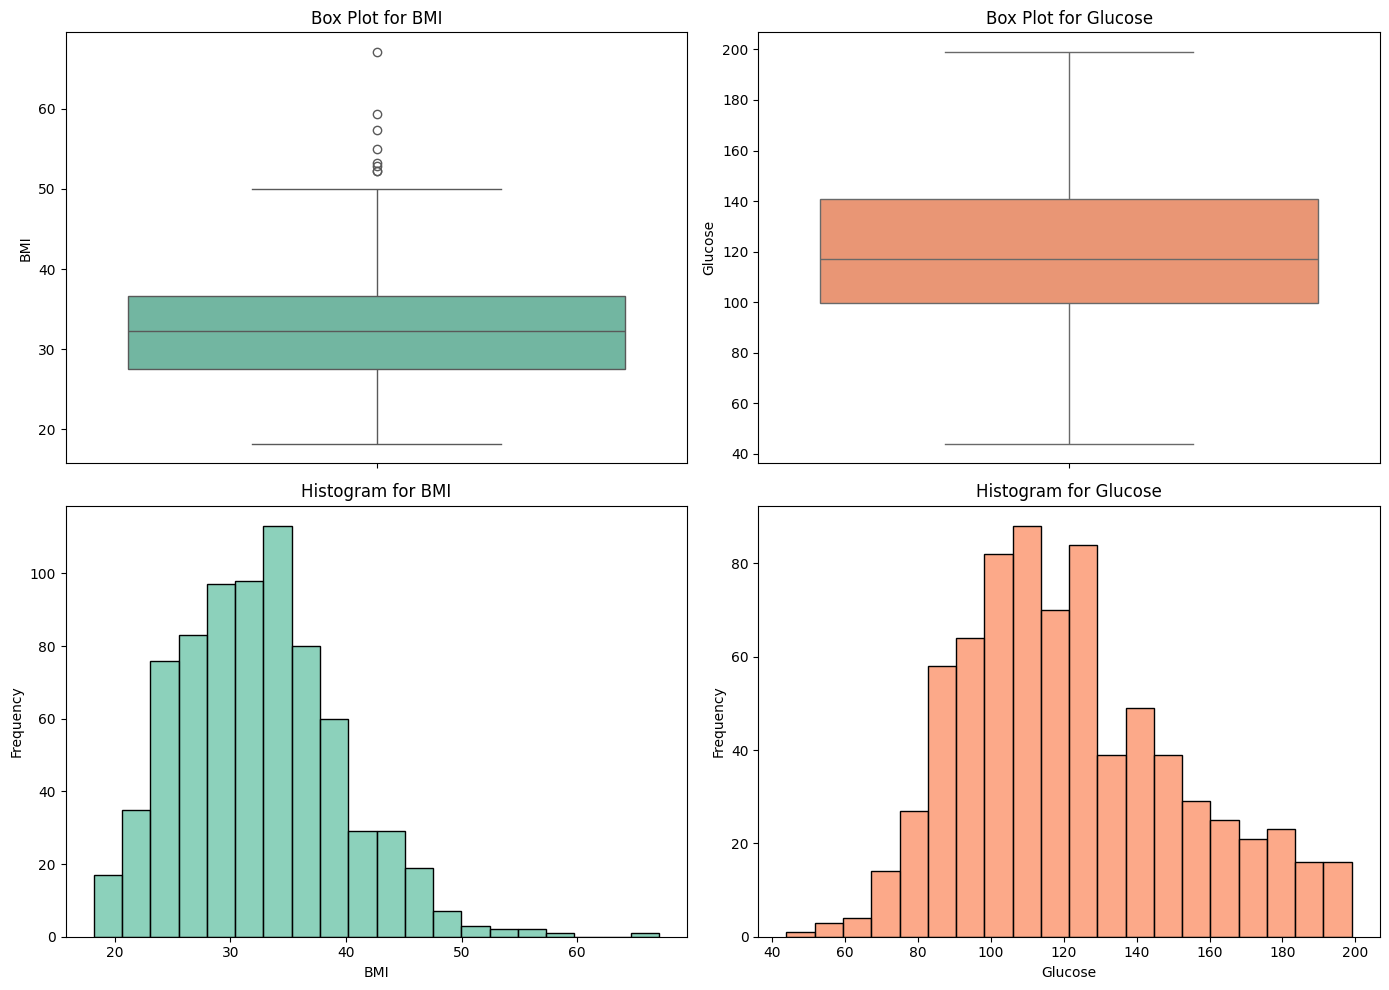

In [10]:
# Filter out rows where BMI or Glucose is zero
diabetes_final = diabetes_filtered[(diabetes_filtered['BMI'] > 0) & (diabetes_filtered['Glucose'] > 0)]

# Display the number of rows removed
removed_rows = len(diabetes_filtered) - len(diabetes_final)
print(f"Removed {removed_rows} rows with BMI or Glucose values of zero.")

# View summary stats for selected features (excluding 'Pregnancies')
diabetes_stats = diabetes_final[['Glucose', 'Age', 'BMI']].describe()
print("Summary Statistics:\n", diabetes_stats)

# Set up the color palette
palette = sns.color_palette("Set2")

# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Box plot for BMI
sns.boxplot(y='BMI', data=diabetes_final, color=palette[0], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot for BMI')

# Histogram for BMI
sns.histplot(diabetes_final['BMI'], bins=20, kde=False, color=palette[0], ax=axes[1, 0])
axes[1, 0].set_title('Histogram for BMI')
axes[1, 0].set_xlabel('BMI')
axes[1, 0].set_ylabel('Frequency')

# Box plot for Glucose
sns.boxplot(y='Glucose', data=diabetes_final, color=palette[1], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot for Glucose')

# Histogram for Glucose
sns.histplot(diabetes_final['Glucose'], bins=20, kde=False, color=palette[1], ax=axes[1, 1])
axes[1, 1].set_title('Histogram for Glucose')
axes[1, 1].set_xlabel('Glucose')
axes[1, 1].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

In [11]:
# Features and target variable
X = diabetes_final.drop(columns=['Outcome'])  # Features (all columns except the target)
y = diabetes_final['Outcome']                # Target (Outcome column)

# Combine features and target for shuffling
data = pd.concat([X, y], axis=1)

# Shuffle the dataset
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Determine the split index (80-20 split)
split_index = int(0.8 * len(data_shuffled))

# Split the data into training and testing sets
train_data = data_shuffled.iloc[:split_index]
test_data = data_shuffled.iloc[split_index:]

# Separate features and target for training and testing sets
X_train = train_data.drop(columns=['Outcome'])
y_train = train_data['Outcome']
X_test = test_data.drop(columns=['Outcome'])
y_test = test_data['Outcome']

# Display the shape of the splits
print(f"Training Set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing Set: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training Set: X_train: (601, 3), y_train: (601,)
Testing Set: X_test: (151, 3), y_test: (151,)


In [12]:
# Define the z-score scaling function
def z_score_scale(column, mean_val=None, std_val=None):
    if mean_val is None:
        mean_val = column.mean()
    if std_val is None:
        std_val = column.std()
    return (column - mean_val) / std_val, mean_val, std_val

# Apply the z-score scaling to the training set
X_train_scaled = pd.DataFrame()
scaling_params = {}  # Store mean and std for each column

for col in X_train.columns:
    X_train_scaled[col], mean_val, std_val = z_score_scale(X_train[col])
    scaling_params[col] = (mean_val, std_val)

    # Scale the testing set using the training set's mean and std
    X_test_scaled = pd.DataFrame()
for col in X_test.columns:
    mean_val, std_val = scaling_params[col]  # Retrieve training set's mean and std
    X_test_scaled[col], _, _ = z_score_scale(X_test[col], mean_val=mean_val, std_val=std_val)

# View the first few rows of the scaled training dataset
print("Scaled Training Data:\n", X_train_scaled.head())

# View the first few rows of the scaled testing dataset
print("Scaled Testing Data:\n", X_test_scaled.head())

Scaled Training Data:
     Glucose       BMI       Age
0  1.693114  0.625389  0.404345
1  0.083984  0.482996 -1.049277
2  2.415581 -1.040601  1.857967
3 -1.262432 -0.442553  0.233331
4 -0.310089  0.767781  0.660866
Scaled Testing Data:
       Glucose       BMI       Age
601  0.510896 -0.058094  0.489852
602  1.200523 -0.172008 -0.792755
603 -0.014535  0.952891 -0.878262
604 -0.671323 -1.510495 -0.963770
605 -0.474286 -0.855491 -0.878262


In [15]:
# Sigmoid function
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [16]:
def compute_cost_with_regularization(X, y, w, b, lambda_):
    m = X.shape[0]

    # Compute the linear combination of inputs and weights
    z = np.dot(X, w) + b

    # Compute the predictions using the sigmoid function
    f_wb = sigmoid(z)

    # Compute the cost without regularization
    cost = -(1/m) * np.sum(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))

    # Compute the regularization term (excluding the bias term)
    reg_cost = (lambda_ / (2 * m)) * np.sum(np.square(w))

    # Total cost with regularization
    total_cost = cost + reg_cost

    return total_cost

In [17]:
def compute_gradient_with_regularization(X, y, w, b, lambda_):
    m = X.shape[0]

    # Compute predictions
    f_wb = sigmoid(np.dot(X, w) + b)

    # Calculate the error
    error = f_wb - y

    # Compute the gradient for the weights (vectorized)
    dj_dw = (1/m) * np.dot(X.T, error) + (lambda_/m) * w

    # Compute the gradient for the bias (vectorized)
    dj_db = (1/m) * np.sum(error)

    return dj_db, dj_dw

In [18]:
def gradient_descent_with_regularization(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    # Lists to store the cost J and weights at each iteration (primarily for graphing later)
    J_history = []
    w_history = []

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha, and gradient
        w_in -= alpha * dj_dw
        b_in -= alpha * dj_db

        # Save cost J at each iteration
        if i < 3000:  # Prevent resource exhaustion
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every 250 iterations
        if i % 250 == 0 or i == (num_iters - 1):
            w_history.append(w_in.copy())
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

    return w_in, b_in, J_history, w_history  # Return w and b along with history for graphing

In [19]:
def predict(X, w, b):
    # Compute the linear combination of features and weights
    z_wb = np.dot(X, w) + b

    # Apply the sigmoid function to get probabilities
    f_wb = sigmoid(z_wb)

    # Apply the threshold to get binary predictions
    p = (f_wb >= 0.5).astype(int)

    return p


Iteration    0: Cost     0.69
Iteration  250: Cost     0.55
Iteration  500: Cost     0.51
Iteration  750: Cost     0.49
Iteration 1000: Cost     0.49
Iteration 1250: Cost     0.48
Iteration 1500: Cost     0.48
Iteration 1750: Cost     0.48
Iteration 2000: Cost     0.48
Iteration 2250: Cost     0.48
Iteration 2500: Cost     0.48
Iteration 2750: Cost     0.48
Iteration 2999: Cost     0.48
(w, b) found by gradient descent: (w = [1.04446059 0.6902165  0.34443329], b = -0.7553)


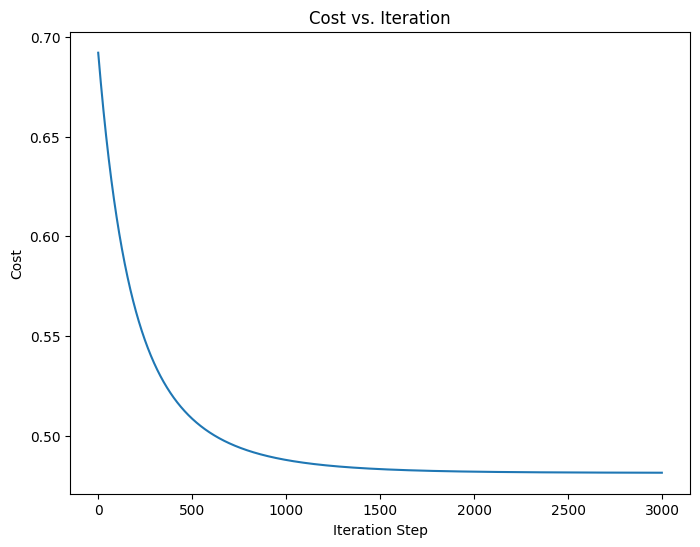

In [20]:
# Initialize parameters
w_init = np.zeros(X_train_scaled.shape[1])  # Initialize weights for all features to 0
b_init = 0  # Initialize bias to 0
alpha = 0.01  # Learning rate
iterations = 3000  # Number of iterations
lambda_ = 0.001  # Regularization parameter

# Run gradient descent with regularization
w_final, b_final, J_history, w_history = gradient_descent_with_regularization(
    X_train_scaled,               # Scaled training features
    y_train,                      # Training labels
    w_init,                       # Initial weights
    b_init,                       # Initial bias
    compute_cost_with_regularization,  # Cost function with regularization
    compute_gradient_with_regularization,  # Gradient function with regularization
    alpha,                        # Learning rate
    iterations,                   # Number of iterations
    lambda_                       # Regularization parameter
)

print(f"(w, b) found by gradient descent: (w = {w_final}, b = {b_final:.4f})")

# Plot cost versus iteration
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(iterations), J_history)
ax.set_title("Cost vs. Iteration")
ax.set_ylabel('Cost')
ax.set_xlabel('Iteration Step')
plt.show()

Iteration    0: Cost     0.69
Iteration  250: Cost     0.55
Iteration  500: Cost     0.51
Iteration  750: Cost     0.49
Iteration 1000: Cost     0.49
Iteration 1250: Cost     0.48
Iteration 1500: Cost     0.48
Iteration 1750: Cost     0.48
Iteration 2000: Cost     0.48
Iteration 2250: Cost     0.48
Iteration 2500: Cost     0.48
Iteration 2750: Cost     0.48
Iteration 2999: Cost     0.48
(w, b) found by gradient descent: (w = [1.04446059 0.6902165  0.34443329], b = -0.7553)


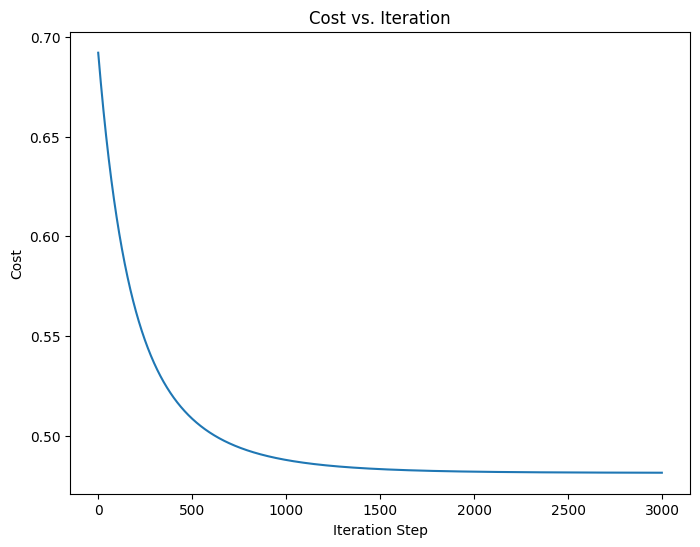

In [21]:
# Initialize parameters
w_init = np.zeros(X_train_scaled.shape[1])  # Initialize weights for all features to 0
b_init = 0  # Initialize bias to 0
alpha = 0.01  # Learning rate
iterations = 3000  # Number of iterations
lambda_ = 0.001  # Regularization parameter

# Run gradient descent with regularization
w_final, b_final, J_history, w_history = gradient_descent_with_regularization(
    X_train_scaled,               # Scaled training features
    y_train,                      # Training labels
    w_init,                       # Initial weights
    b_init,                       # Initial bias
    compute_cost_with_regularization,  # Cost function with regularization
    compute_gradient_with_regularization,  # Gradient function with regularization
    alpha,                        # Learning rate
    iterations,                   # Number of iterations
    lambda_                       # Regularization parameter
)

print(f"(w, b) found by gradient descent: (w = {w_final}, b = {b_final:.4f})")

# Plot cost versus iteration
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(iterations), J_history)
ax.set_title("Cost vs. Iteration")
ax.set_ylabel('Cost')
ax.set_xlabel('Iteration Step')
plt.show()

In [23]:
# Define the path to the dataset
file_path = '/content/diabetes.csv'

# Load the dataset into a DataFrame
new_diabetes_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the new dataset:\n", new_diabetes_df.head())

# Display summary statistics of the dataset
print("\nSummary Statistics:\n", new_diabetes_df.describe())

# Display information about the dataset (data types, non-null counts, etc.)
print("\nDataset Information:\n")
new_diabetes_df.info()

First few rows of the new dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.36957

In [26]:
# Load the new dataset
file_path = '/content/diabetes_prediction_dataset.csv.zip'
new_diabetes_df = pd.read_csv(file_path)

# Drop irrelevant columns
new_diabetes_df = new_diabetes_df[['age', 'bmi', 'blood_glucose_level', 'diabetes']]

# Rename the columns to match the old dataset
new_diabetes_df.columns = ['Age', 'BMI', 'Glucose', 'Outcome']

# Display the first few rows of the cleaned dataset
print("Cleaned and Renamed Dataset:\n", new_diabetes_df.head())


Cleaned and Renamed Dataset:
     Age    BMI  Glucose  Outcome
0  80.0  25.19      140        0
1  54.0  27.32       80        0
2  28.0  27.32      158        0
3  36.0  23.45      155        0
4  76.0  20.14      155        0


In [27]:
# Remove missing values
new_diabetes_clean = new_diabetes_df.dropna()

# Remove leading and trailing white spaces
new_diabetes_clean = new_diabetes_clean.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))

# Remove duplicates
new_diabetes_clean = new_diabetes_clean.drop_duplicates()

# Display the cleaned data
print("Cleaned Data:\n", new_diabetes_clean.head())

Cleaned Data:
     Age    BMI  Glucose  Outcome
0  80.0  25.19      140        0
1  54.0  27.32       80        0
2  28.0  27.32      158        0
3  36.0  23.45      155        0
4  76.0  20.14      155        0


Summary Statistics:
             Glucose           Age           BMI
count  74539.000000  74539.000000  74539.000000
mean     138.833859     41.229113     27.385951
std       41.755241     22.678242      7.627303
min       80.000000      0.080000     10.010000
25%      100.000000     23.000000     22.190000
50%      140.000000     42.000000     26.750000
75%      159.000000     59.000000     31.480000
max      300.000000     80.000000     95.690000


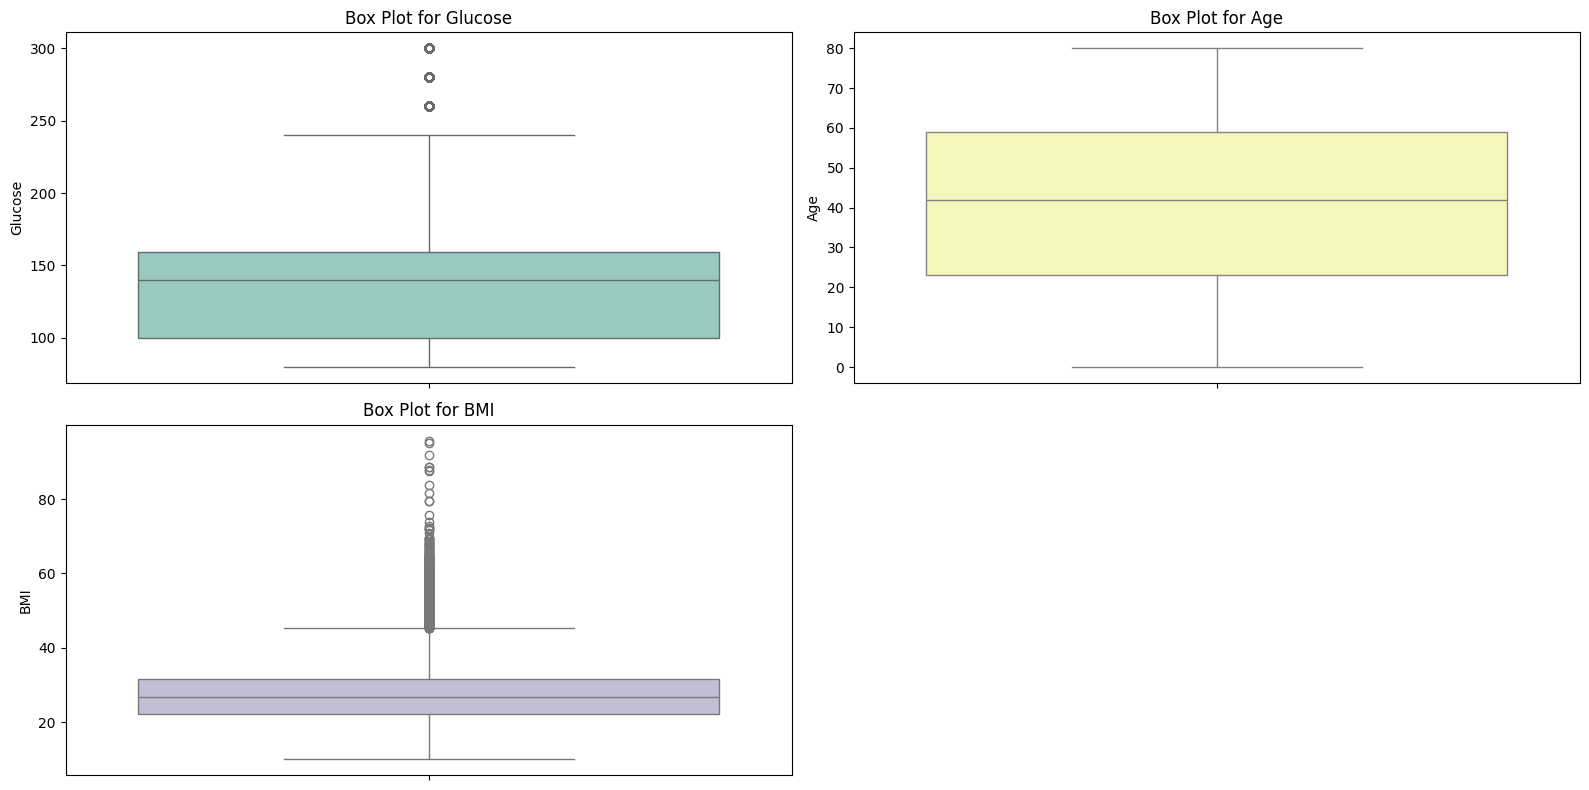

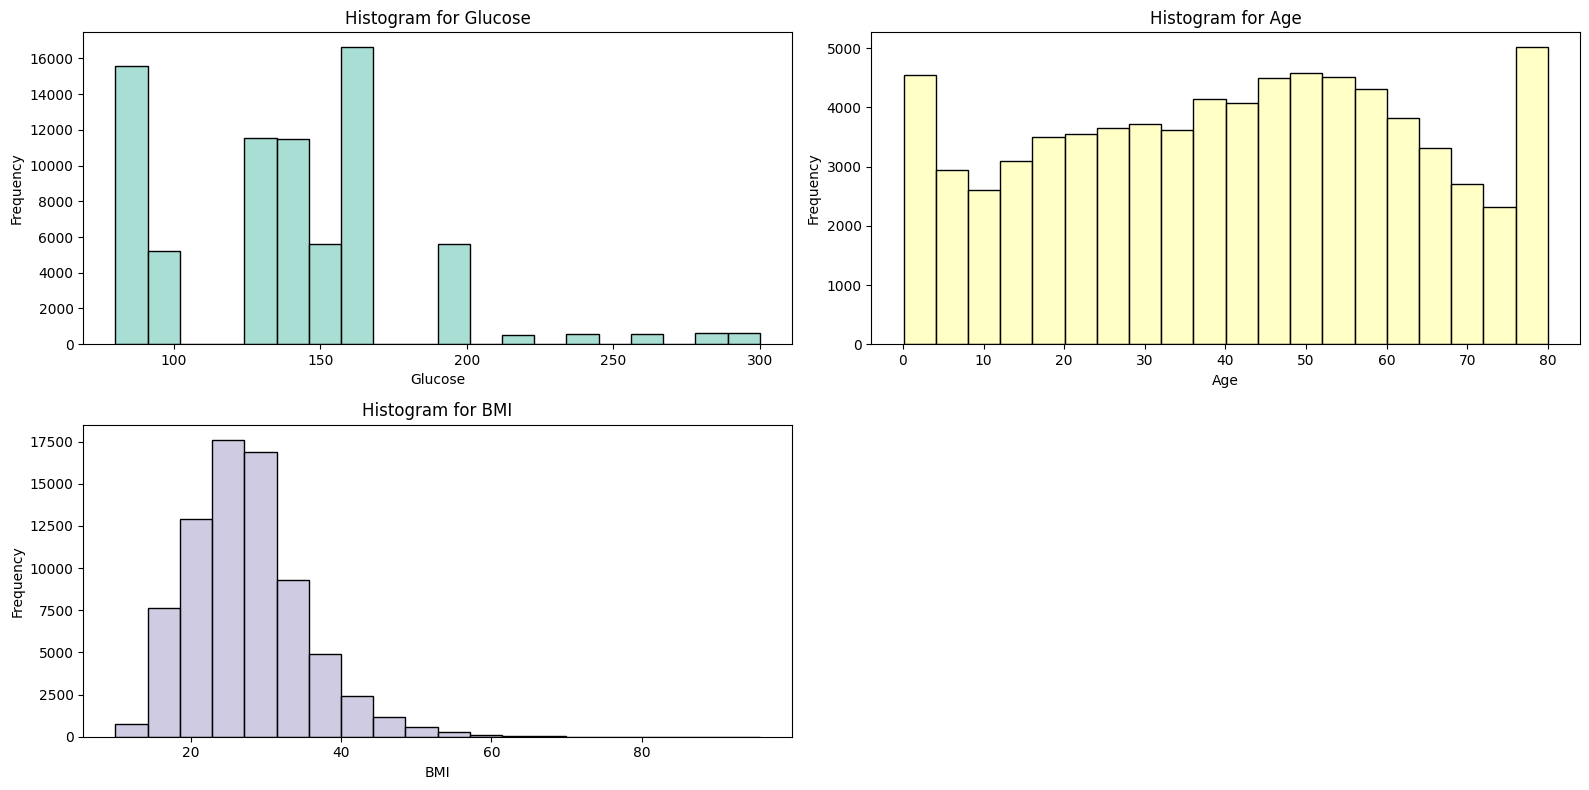

In [28]:
# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

# View summary stats for selected features
diabetes_stats = new_diabetes_clean[['Glucose', 'Age', 'BMI']].describe()
print("Summary Statistics:\n", diabetes_stats)

# Set up the color palette
palette = sns.color_palette("Set3")

# Identify outliers using box plots for each feature using Seaborn
plt.figure(figsize=(16, 8))

# Box plot for Glucose
plt.subplot(2, 2, 1)
sns.boxplot(y='Glucose', data=new_diabetes_clean, color=palette[0])
plt.title('Box Plot for Glucose')

# Box plot for Age
plt.subplot(2, 2, 2)
sns.boxplot(y='Age', data=new_diabetes_clean, color=palette[1])
plt.title('Box Plot for Age')

# Box plot for BMI
plt.subplot(2, 2, 3)
sns.boxplot(y='BMI', data=new_diabetes_clean, color=palette[2])
plt.title('Box Plot for BMI')

plt.tight_layout()
plt.show()

# Analyze general distribution of values using histograms with Seaborn
plt.figure(figsize=(16, 8))

# Histogram for Glucose
plt.subplot(2, 2, 1)
sns.histplot(new_diabetes_clean['Glucose'], bins=20, kde=False, color=palette[0])
plt.title('Histogram for Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')

# Histogram for Age
plt.subplot(2, 2, 2)
sns.histplot(new_diabetes_clean['Age'], bins=20, kde=False, color=palette[1])
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for BMI
plt.subplot(2, 2, 3)
sns.histplot(new_diabetes_clean['BMI'], bins=20, kde=False, color=palette[2])
plt.title('Histogram for BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [31]:
# Load the new dataset
file_path = '/content/diabetes_prediction_dataset.csv.zip'
new_diabetes_df = pd.read_csv(file_path)

# Drop irrelevant columns and rename remaining columns to match the original dataset
new_diabetes_df = new_diabetes_df[['age', 'bmi', 'blood_glucose_level', 'diabetes']]
new_diabetes_df.columns = ['Age', 'BMI', 'Glucose', 'Outcome']

# Clean the data: remove missing values, trim whitespaces, and remove duplicates
new_diabetes_clean = new_diabetes_df.dropna().apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x)).drop_duplicates()

# Save the actual Outcome column for future comparison
actual_outcomes = new_diabetes_clean['Outcome'].copy()

# Remove the Outcome column before making predictions
X_new = new_diabetes_clean.drop(columns=['Outcome'])

# Normalize the features in the new dataset using the same method as the training data
def min_max_scale(column, min_val=None, max_val=None):
    if min_val is None:
        min_val = column.min()
    if max_val is None:
        max_val = column.max()
    return (column - min_val) / (max_val - min_val), min_val, max_val

X_new_scaled = pd.DataFrame()

for col in ['Glucose', 'BMI', 'Age']:
    X_new_scaled[col], min_val, max_val = min_max_scale(X_new[col])

# Run the prediction model on the normalized data
predicted_outcomes = predict(X_new_scaled, w_final, b_final)

# Add the predicted outcomes to the DataFrame
new_diabetes_clean['PredictOutcome'] = predicted_outcomes

# Compare the predicted outcomes with the actual outcomes
comparison_df = pd.DataFrame({
    'ActualOutcome': actual_outcomes,
    'PredictOutcome': predicted_outcomes
})
# Display the first few rows of the comparison
print(comparison_df.head())

# Calculate and print the model accuracy
correct_predictions = (comparison_df['ActualOutcome'] == comparison_df['PredictOutcome']).sum()
total_predictions = len(comparison_df)
accuracy = correct_predictions / total_predictions
print(f"Model Accuracy: {accuracy:.4f}")

   ActualOutcome  PredictOutcome
0              0               0
1              0               0
2              0               0
3              0               0
4              0               1
Model Accuracy: 0.8161
